## Market Dynamics of Global Best-Selling Books: A Data-Driven Exploration

### Data Storytelling: SpringBoard Data Science Career Track

by Naomi Lopez 

This dataset contains the top 100 global best-selling books, detailing each title by rank, author, sales, publisher, and genre. Through this analysis, I will explore trends and key influences within the best-sellers market. The primary aim is to draw out insights for stakeholders to predict market trends and understand underlying popularity, beyond the dominance of high-impact outliers.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Import csv and create data frame (df)
df = pd.read_csv("best_selling_books.csv")

df.head()

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [5]:
df.isnull().sum()

Rank            0
Title           0
Author          0
Volume Sales    0
Publisher       0
Genre           0
dtype: int64

#### Discussion:
This is a clean data set without any missing values in each column. Therefore, I can now focus on exploring the data.

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [7]:
#Convert Volume Sales to str
df['Volume Sales'] = df['Volume Sales'].astype(str)

#Remove commas and convert to int
df['Volume Sales'] = df['Volume Sales'].str.replace(',', '').astype(int)

#Verify changes
print(df['Volume Sales'].head())


0    5094805
1    4475152
2    4200654
3    4179479
4    3758936
Name: Volume Sales, dtype: int64


In [8]:
df.describe()

,Rank,Volume Sales
count,100.000000,1.000000e+02
mean,50.500000,1.497272e+06
std,29.011492,9.077396e+05
min,1.000000,7.910950e+05
25%,25.750000,9.420580e+05
50%,50.500000,1.111938e+06
75%,75.250000,1.781836e+06
max,100.000000,5.094805e+06


In [9]:
df.count()

Rank            100
Title           100
Author          100
Volume Sales    100
Publisher       100
Genre           100
dtype: int64

## Top Selling Titles

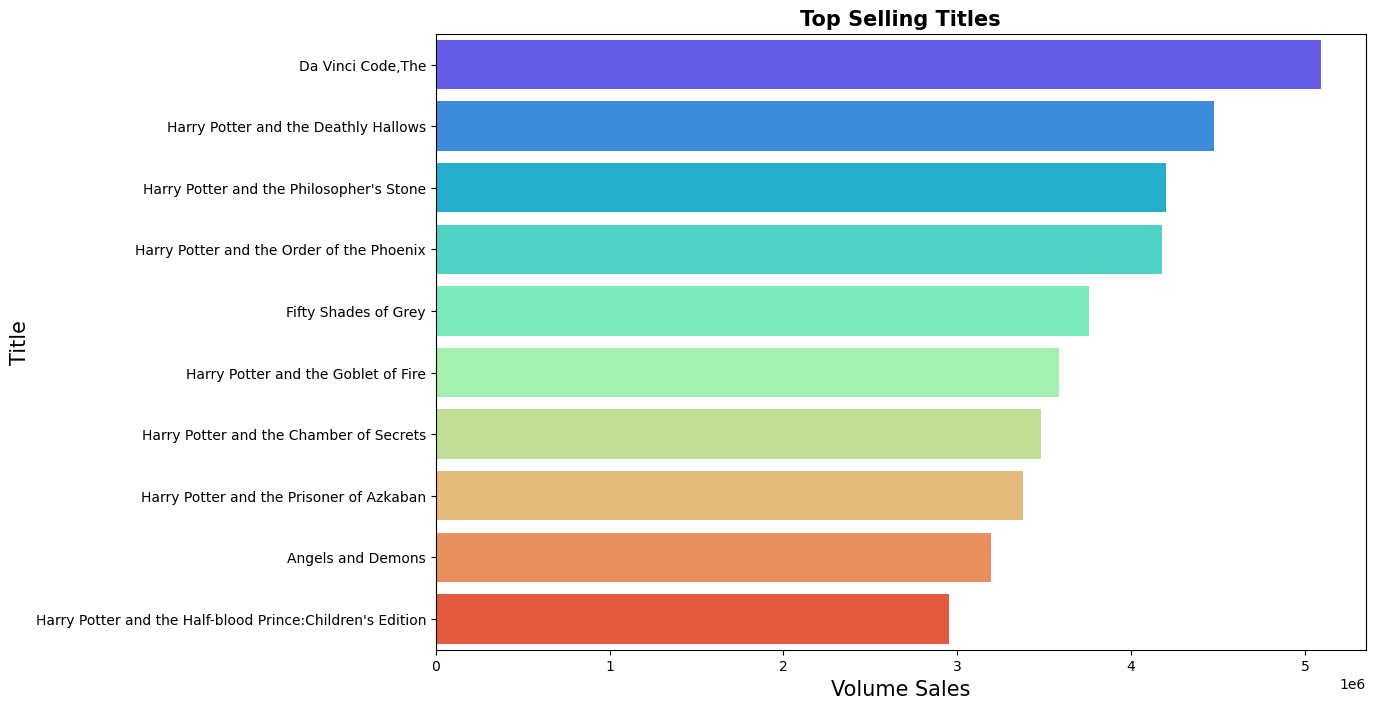

In [10]:
#Sort titles by Volume Sales and select the top to titles
top_titles = df.sort_values(by='Volume Sales', ascending=False).head(10)

# Create box plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Volume Sales', y='Title', data=top_titles, palette='rainbow')
plt.xlabel('Volume Sales',fontsize=15)
plt.ylabel('Title',fontsize=15)
plt.title('Top Selling Titles',fontsize=15, fontweight='bold')
plt.show()

##### Discussion: 
"The Da Vinci Code" was the top-selling book, with sales just over 5 million. Close behind in rank were Harry Potter books, taking 2nd, 3rd, and 4th places. In fact, all seven books in the Harry Potter series are ranked among the top ten global best sellers. From the graph, we can also see that each of the top ten best sellers made over 2.5 million in sales.

## Distribution of Volume Sales

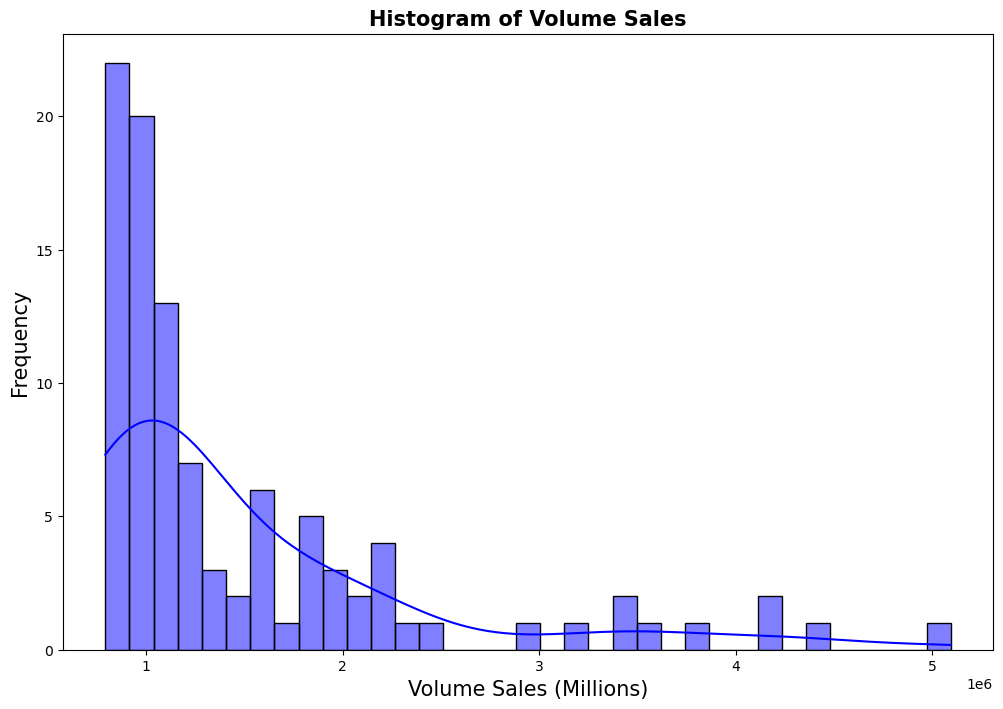

In [11]:
# Create a histogram
plt.figure(figsize=(12, 8))
sns.histplot(df['Volume Sales'], bins=35, kde=True, color='blue')
plt.xlabel('Volume Sales (Millions)', fontsize = 15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Volume Sales',fontsize=15, fontweight='bold')
plt.show()

##### Discussion: 
The distribution of volume sales is skewed to the right, indicating that most books within the top 100 best sellers list made under 1 million in sales. Top titles, such as "The Da Vinci Code" and the top-ranking "Harry Potter" books, are outliers that contribute to the uneven distribution within the histogram.

## Top Selling Authors

Text(0, 0.5, 'Authors')

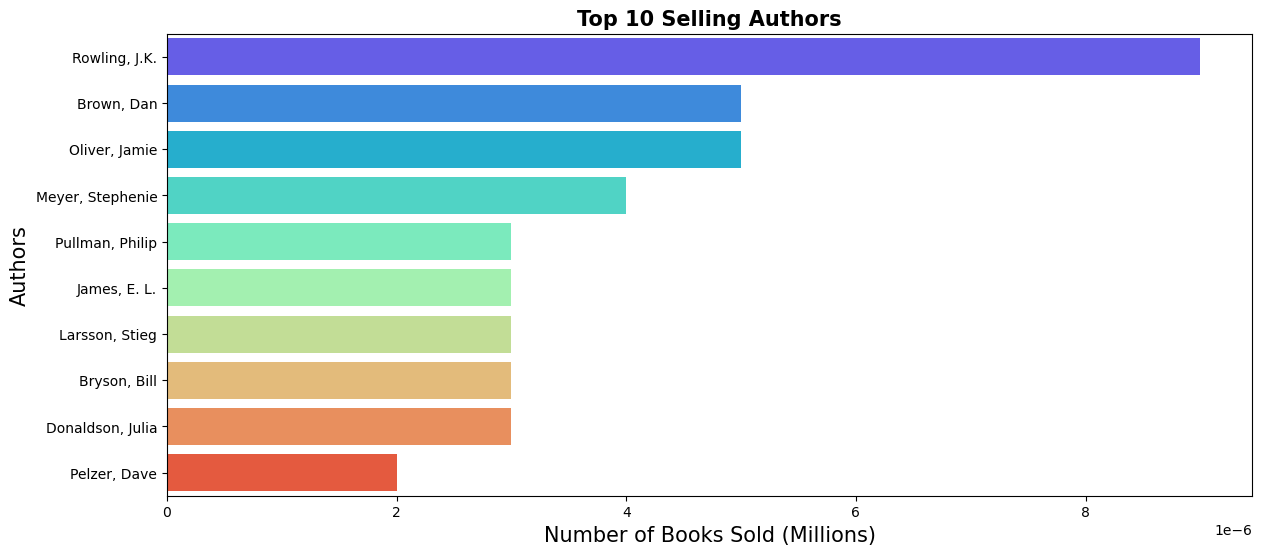

In [12]:
plt.figure(figsize=(14,6))
top_selling_authors= df['Author'].value_counts().head(10)
sns.barplot(x=top_selling_authors.values/1e6, y=top_selling_authors.index, palette ='rainbow')
plt.title('Top 10 Selling Authors',fontsize = 15,fontweight='bold')
plt.xlabel('Number of Books Sold (Millions)',fontsize = 15)
plt.ylabel('Authors',fontsize = 15)

##### Discussin: 
The top-selling author was J.K. Rowling, who sold almost double the copies of the second and third top-selling authors. Despite Dan Brown's book, The Da Vinci Code, having the highest sales per title, he was outperformed by J.K. Rowling in total sales. This is a fair conclusion, as the graph shows that J.K. Rowling sold 9 books, while the other top ten authors sold an average of 4 books each. 

#### Number of Titles Each Top Author Has Published

In [151]:
# Group by Author and sum the Volume Sales
author_sales = df.groupby('Author')['Volume Sales'].sum().reset_index()

# Sort authors by total sales and select the top ten
top_ten_authors_sales = author_sales.sort_values(by='Volume Sales', ascending=False).head(10)

# Group by Author and count the number of titles
author_titles = df.groupby('Author')['Title'].count().reset_index()
author_titles.columns = ['Author', 'Title_Count']

# Merge the top ten authors by sales with their respective title counts
top_ten_authors = pd.merge(top_ten_authors_sales, author_titles, on='Author')

# Display the result
print(top_ten_authors)

             Author  Volume Sales  Title_Count
0     Rowling, J.K.      28494745            9
1        Brown, Dan      14462827            5
2      James, E. L.       8432648            3
3  Meyer, Stephenie       8308136            4
4    Larsson, Stieg       5603489            3
5     Oliver, Jamie       5160955            5
6  Donaldson, Julia       3832515            3
7      Bryson, Bill       3675078            3
8   Pullman, Philip       3220977            3
9  Hosseini, Khaled       3213111            2


## Genres

#### Genres by Volume of Sales

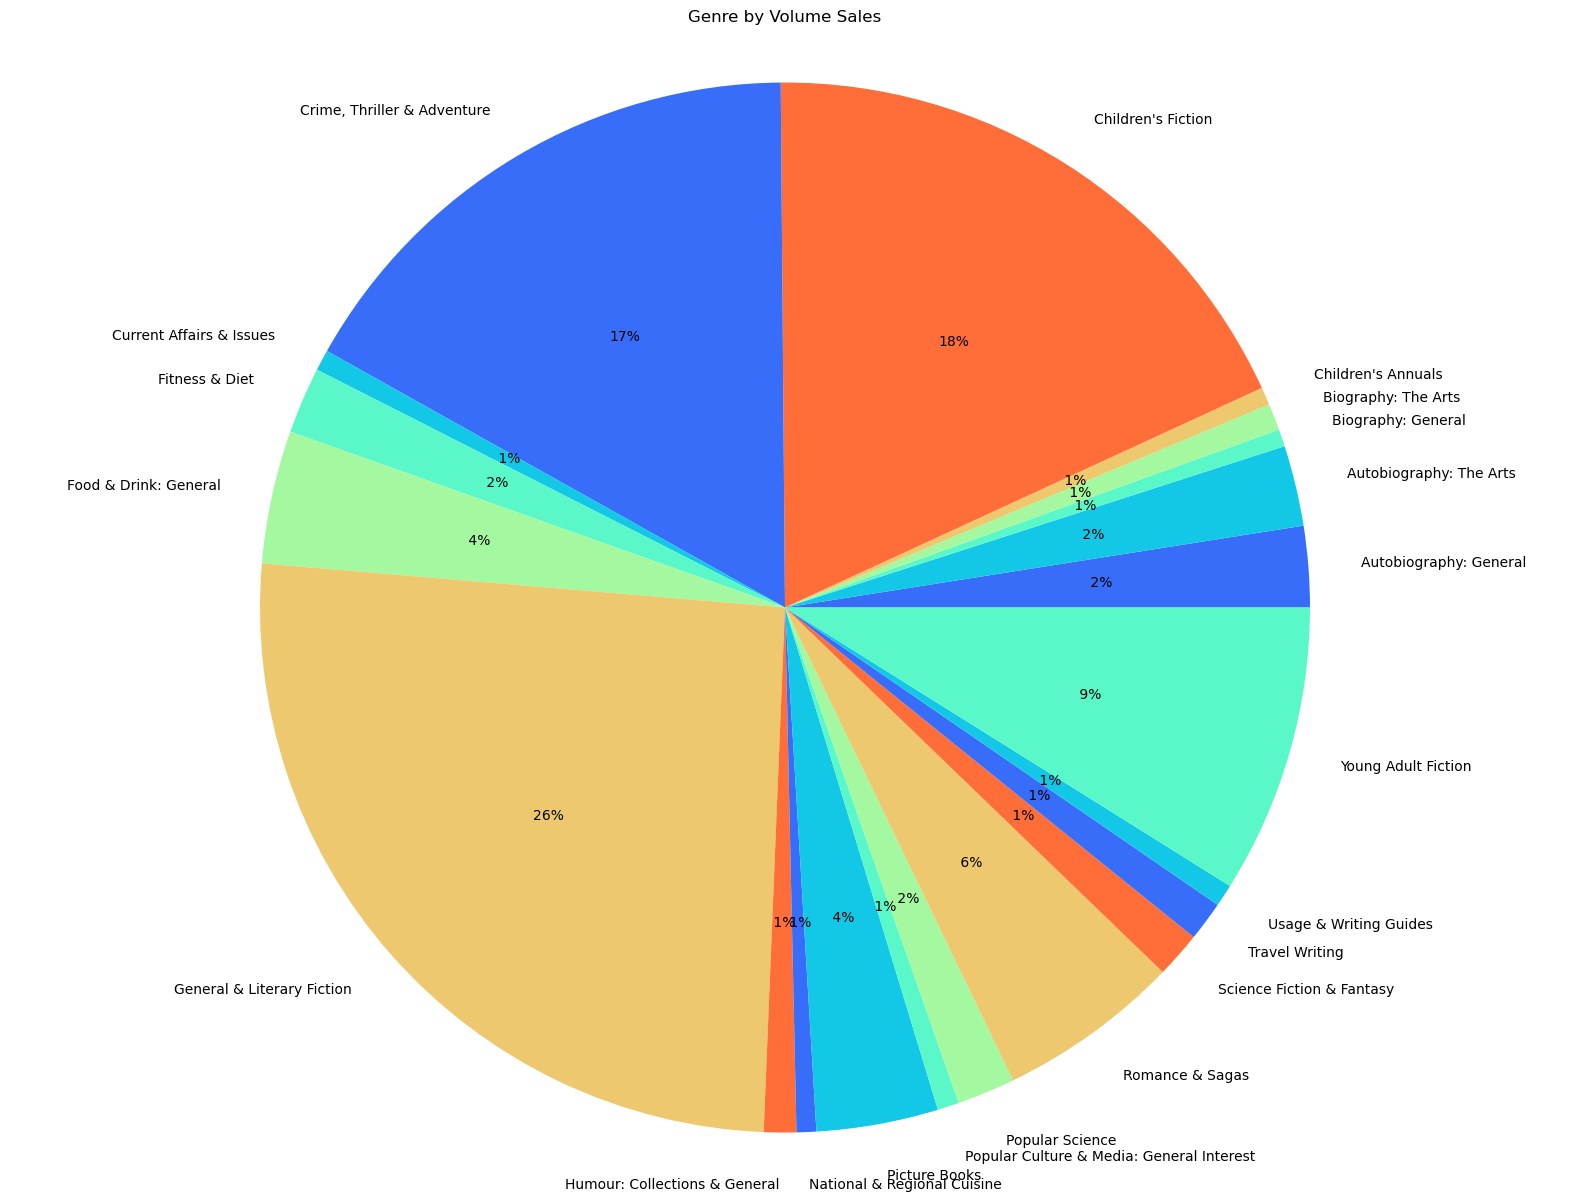

In [152]:
# Group by Genre and sum the Volume Sales
genre_sales = df.groupby('Genre')['Volume Sales'].sum().reset_index()

# Create pie plot
plt.figure(figsize=(20,15))
plt.pie(genre_sales['Volume Sales'], labels=genre_sales['Genre'],autopct='%2.0f%%', colors=sns.color_palette('rainbow'))
plt.title('Genre by Volume Sales')
plt.axis('equal') 
plt.show()



#### Genres within the Data Set Overall
Despite J.K. Rowling's success in Children's Fiction and Dan Brown's in Crime, Thriller & Adventure, the top-selling genre was General & Literary Fiction. This may initially come as a surprise, but as the bar graph below shows, 33 of the top 100 best sellers were in the genre of General & Literary Fiction.

Number of books in top 100 best sellers by Genre: Genre
General & Literary Fiction                   33
Crime, Thriller & Adventure                  13
Young Adult Fiction                           9
Children's Fiction                            8
Food & Drink: General                         6
Picture Books                                 4
Autobiography: The Arts                       4
Romance & Sagas                               3
Autobiography: General                        3
Fitness & Diet                                3
Popular Science                               2
Science Fiction & Fantasy                     2
Travel Writing                                2
Current Affairs & Issues                      1
Children's Annuals                            1
National & Regional Cuisine                   1
Biography: The Arts                           1
Popular Culture & Media: General Interest     1
Usage & Writing Guides                        1
Humour: Collections & General   

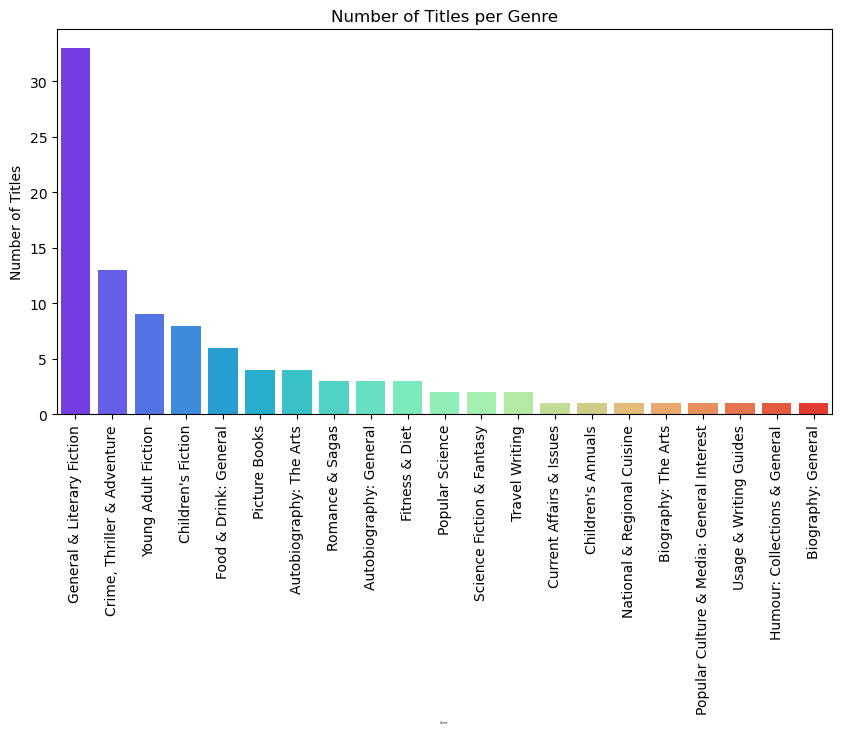

In [165]:
# Count the number of titles per genre
genre_counts = df['Genre'].value_counts()
print("Number of books in top 100 best sellers by Genre:", genre_counts)

# Plot the bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rainbow')
plt.title('Number of Titles per Genre')
plt.xlabel('Genre', fontsize = 2)
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

## Publishers

Text(0, 0.5, 'Number of Books (Millions)')

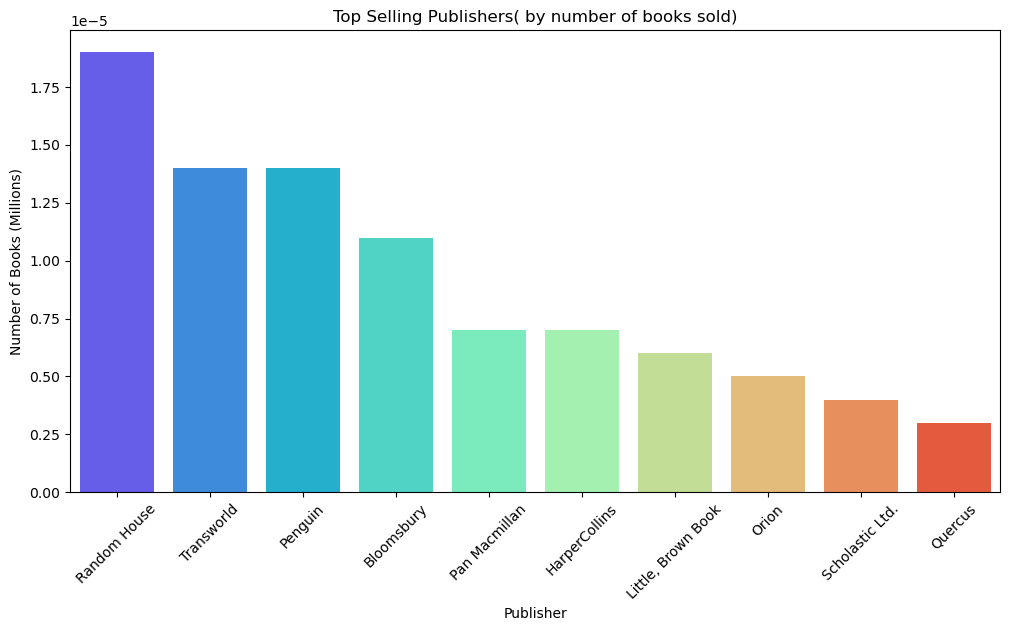

In [14]:
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.index, y= top_publishers/1e6,palette='rainbow') 
plt.title('Top Selling Publishers( by number of books sold)')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.ylabel('Number of Books (Millions)')

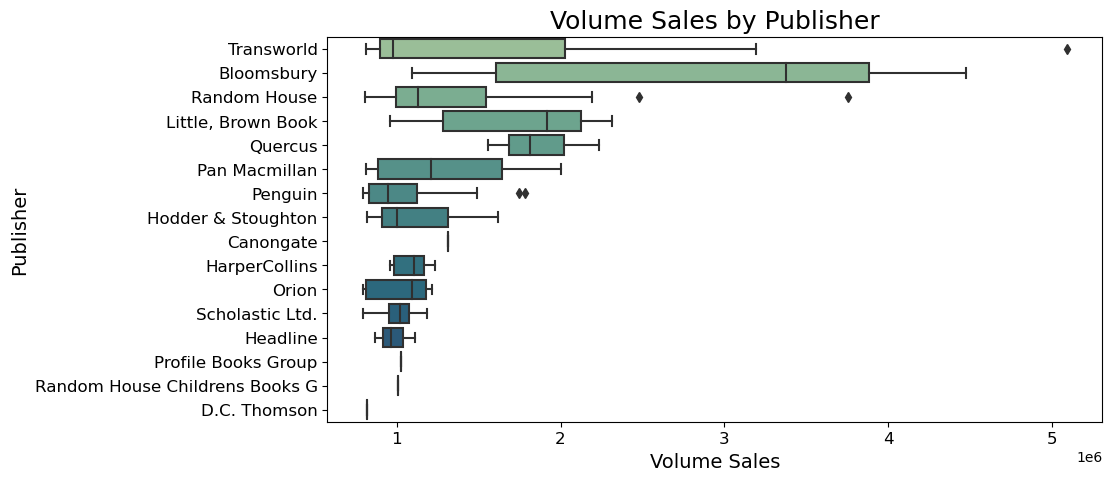

In [154]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='Publisher', x='Volume Sales', data=df, orient='h', palette='crest')
plt.title('Volume Sales by Publisher', fontsize=18, fontweight='normal')
plt.xlabel('Volume Sales', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Discussion: 
Random House sold the most books overall, but Bloomsbury generated the highest median revenue in sales. This is understandable given that Bloomsbury published the "Harry Potter" series, which significantly boosted their sales figures. On the other hand, Transworld, the publisher of "The Da Vinci Code", has one of the lowest medians for volume sales but achieves the highest total sales overall due to the exceptional performance of this single title, as seen in the outlier in the graph.

Random House also has a high volume of sales and sells the most books, with Literary Fiction being their top-selling genre, as depicted in the bar graph below.

Little, Brown Book ranks fourth in volume of sales, with Young Adult Fiction being their leading genre, which is also the fourth highest genre by sales overall, as illustrated in the pie chart above.

In [155]:

# Identify the top ten titles by volume sales
top_ten_titles = df.nlargest(10, 'Volume Sales')

# Create a sub DataFrame with the top ten titles, genre, publisher, and volume sales
top_ten_info = top_ten_titles[['Title', 'Genre', 'Publisher', 'Volume Sales']]

# Style the DataFrame
styled_df = top_ten_info.style.background_gradient(cmap='viridis').set_caption("Top 10 Titles by Volume Sales")

styled_df



,Title,Genre,Publisher,Volume Sales
0,"Da Vinci Code,The","Crime, Thriller & Adventure",Transworld,5094805
1,Harry Potter and the Deathly Hallows,Children's Fiction,Bloomsbury,4475152
2,Harry Potter and the Philosopher's Stone,Children's Fiction,Bloomsbury,4200654
3,Harry Potter and the Order of the Phoenix,Children's Fiction,Bloomsbury,4179479
4,Fifty Shades of Grey,Romance & Sagas,Random House,3758936
5,Harry Potter and the Goblet of Fire,Children's Fiction,Bloomsbury,3583215
6,Harry Potter and the Chamber of Secrets,Children's Fiction,Bloomsbury,3484047
7,Harry Potter and the Prisoner of Azkaban,Children's Fiction,Bloomsbury,3377906
8,Angels and Demons,"Crime, Thriller & Adventure",Transworld,3193946
9,Harry Potter and the Half-blood Prince:Children's Edition,Children's Fiction,Bloomsbury,2950264


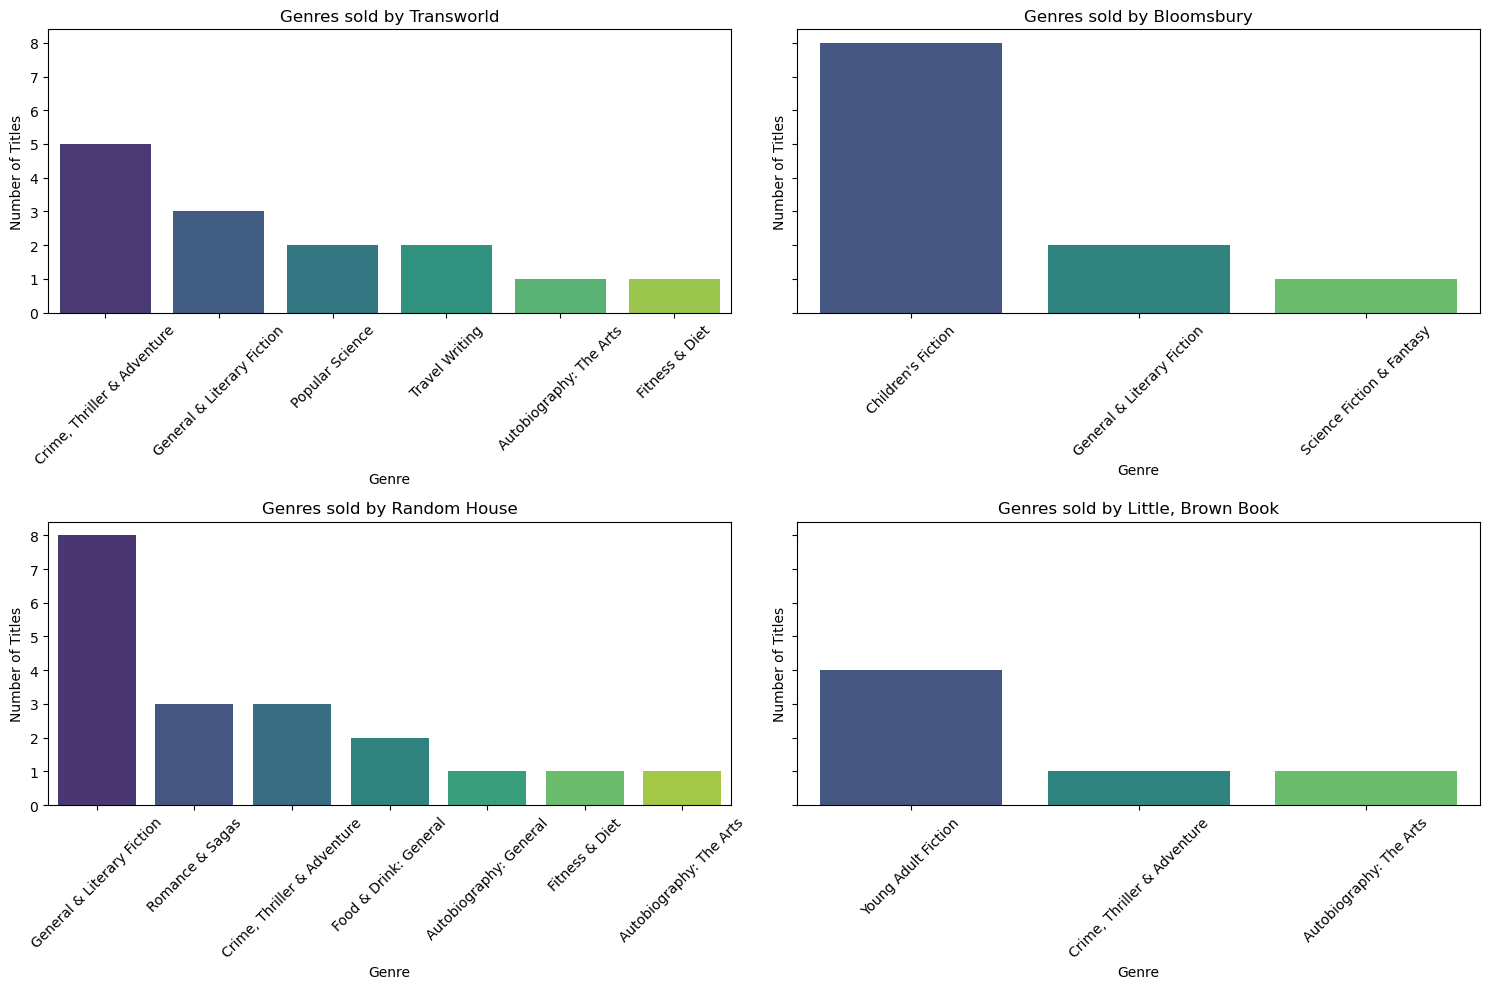

In [172]:
# List of publishers to filter
publishers = ["Transworld","Bloomsbury","Random House", "Little, Brown Book"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, publisher in enumerate(publishers):
    # Filter DataFrame for the publisher
    publisher_df = df[df['Publisher'] == publisher]
    
    # Count the genres
    genre_counts = publisher_df['Genre'].value_counts()
    
    # Plot the bar graph for each publisher
    sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Genres sold by {publisher}')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Number of Titles')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## Conclusion
The Dominance of Outliers vs. Underlying Popularity

The analysis underscores the importance of distinguishing between the market dominance of outliers and the true popularity of genres among the masses. While blockbuster books and successful series can dominate sales figures and influence perceptions, the broad and enduring appeal of genres like General & Literary Fiction reveals a more nuanced understanding of reader preferences and market trends.

High-impact books significantly skew market perceptions and can lead to the dominance of specific authors and publishers.
To understand underlying popularity, it's essential to explore genres and titles that consistently attract a wide readership, as seen in the case of General & Literary Fiction.
By recognizing the dual impact of outliers and steady popularity, stakeholders in the book market can gain a more comprehensive understanding of market dynamics, reader preferences, and the factors driving sustained success in the publishing industry.